In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import Cleaning_fun as CF
#from Cleaning_fun import print_full
#pd.options.display.max_columns=300
#pd.options.display.max_rows=300


In [22]:
def print_full(x):
    """ This function can be used when we want to see a whole output in Jupyter notebook but just once, for some propouse.
    """
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')

In [3]:
# Obro tot l'arxiu per agafar-ne una mostra aleatoria,
df = pd.read_csv('../Data/train.csv')

/tmp/ipykernel_8878/1194405699.py:2: DtypeWarning: Columns (0,2,22,36,41,45,46,55,61,64,66) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/train.csv')


In [23]:
df.dropna(subset=['price'], inplace=True)
print_full(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263739 entries, 0 to 263759
Data columns (total 82 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            263726 non-null  object 
 1   listing_url                                   263736 non-null  object 
 2   scrape_id                                     263736 non-null  object 
 3   last_scraped                                  263737 non-null  object 
 4   name                                          263641 non-null  object 
 5   description                                   259223 non-null  object 
 6   neighborhood_overview                         153831 non-null  object 
 7   picture_url                                   263724 non-null  object 
 8   host_id                                       263739 non-null  float64
 9   host_url                                      26

In [4]:
# agafo una mostra random,
df_sample = df.sample(5000).reset_index(drop=True)
# La subdivideixo en funcio del preu

In [5]:
df_sample_lowp = df_sample[df_sample.price < 1000] # Let's take just the lower prices to observe the distribution
df_sample_highp = df_sample[df_sample.price > 1000]
df_sample_vlowp = df_sample[df_sample.price < 300]

0    50.0
Name: price, dtype: float64


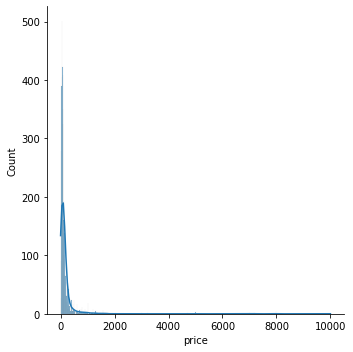

In [6]:
print(df_sample_vlowp.price.mode())
sns.displot(data=df_sample, x='price', kind='hist',kde=True) # Veiem que es una T d'student MOLT deslpaçada cam als preus baixos. 

In [7]:
CF.Clean_columns(df_sample, inpl=True)

In [8]:
df_sample.describe()

,host_listings_count,latitude,longitude,accommodates,bathrooms,beds,price,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,...,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,requires_license
count,4987.000000,5000.000000,5000.000000,5000.000000,0.0,4833.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,3991.000000,3938.000000,3936.000000,3937.000000,5000.000000,5000.000000,5000.000000,5000.000000,3991.000000,0.0
mean,24.187487,44.762968,4.613244,3.759600,NaN,2.415684,164.186400,23.390600,23.322000,24.623600,...,4.646873,4.696760,4.824446,4.771201,14.962000,13.453200,1.302200,0.074600,1.008797,NaN
std,136.223719,5.591468,9.270815,2.377254,NaN,1.926092,448.241916,81.770369,81.720127,83.049235,...,0.657875,0.441849,0.342287,0.345561,50.517492,49.910849,5.816738,1.223493,1.277416,NaN
min,0.000000,34.856170,-10.407010,0.000000,NaN,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000,NaN
25%,1.000000,40.428480,-2.933962,2.000000,NaN,1.000000,51.000000,1.000000,1.000000,2.000000,...,4.580000,4.590000,4.800000,4.690000,1.000000,1.000000,0.000000,0.000000,0.180000,NaN
50%,1.000000,43.770835,2.823775,3.000000,NaN,2.000000,82.000000,2.000000,2.000000,3.000000,...,4.800000,4.830000,4.940000,4.880000,2.000000,1.000000,0.000000,0.000000,0.510000,NaN
75%,5.000000,48.874940,12.301380,5.000000,NaN,3.000000,140.000000,4.000000,4.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,1.000000,0.000000,1.340000,NaN
max,3750.000000,55.723030,26.246470,16.000000,NaN,30.000000,10000.000000,1100.000000,1100.000000,1100.000000,...,5.000000,5.000000,5.000000,5.000000,729.000000,726.000000,158.000000,45.000000,10.390000,NaN


In [9]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 68 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5000 non-null   object 
 1   name                                          4999 non-null   object 
 2   description                                   4929 non-null   object 
 3   neighborhood_overview                         2923 non-null   object 
 4   host_name                                     4987 non-null   object 
 5   host_since                                    4987 non-null   object 
 6   host_location                                 4981 non-null   object 
 7   host_about                                    2643 non-null   object 
 8   host_response_time                            3242 non-null   object 
 9   host_response_rate                            3242 non-null   o

In [10]:
lista_UV = []
for col in CF.num_NaNs(df_sample, n=1000):
    lista_UV.append((df_sample[col].unique(), col))
lista_UV[2]
df_sample[df_sample.host_response_time == 'within a day'].count()

id                                              440
name                                            440
description                                     434
neighborhood_overview                           229
host_name                                       440
                                               ... 
calculated_host_listings_count_private_rooms    440
calculated_host_listings_count_shared_rooms     440
reviews_per_month                               339
last_searched                                    21
requires_license                                  0
Length: 68, dtype: int64

In [11]:
# Let's also take a look on the test we are gonna use,
test = pd.read_csv('../Data/test.csv')


/tmp/ipykernel_8878/3964635950.py:2: DtypeWarning: Columns (0,2,22,40,44,45,54,60,63,65) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('../Data/test.csv')


In [12]:
CF.Clean_columns(test).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87922 entries, 0 to 87921
Data columns (total 67 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            87917 non-null  object 
 1   name                                          87889 non-null  object 
 2   description                                   86405 non-null  object 
 3   neighborhood_overview                         51448 non-null  object 
 4   host_name                                     87776 non-null  object 
 5   host_since                                    87776 non-null  object 
 6   host_location                                 87596 non-null  object 
 7   host_about                                    46620 non-null  object 
 8   host_response_time                            57263 non-null  object 
 9   host_response_rate                            57261 non-null 

In [13]:
df_sample_lowp = df_sample[df_sample.price < 1000] # Let's take just the lower prices to observe the distribution
df_sample_highp = df_sample[df_sample.price > 1000]
df_sample_vlowp = df_sample[df_sample.price < 300]

In [14]:
df_sample_vlowp.price.mode()

0    50.0
Name: price, dtype: float64

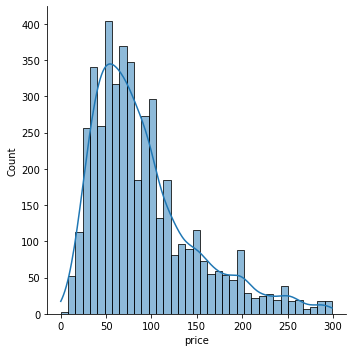

In [15]:
sns.displot(data=df_sample_vlowp, x='price', kind='hist',kde=True)


/home/pomilusky/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


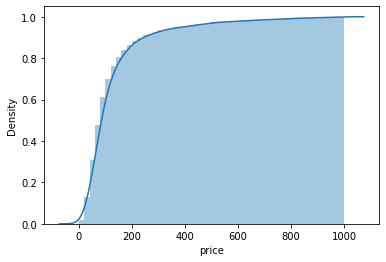

In [16]:
# Behaviour in the rank of thelow prices
sns.distplot(df_sample_lowp.price,
             hist_kws={'cumulative': True},
             kde_kws={'cumulative': True}); 

/home/pomilusky/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


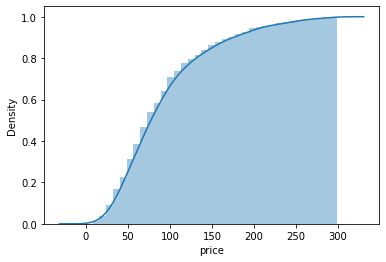

In [17]:
# Behaviour of higher prices,
sns.distplot(df_sample_vlowp.price,
            #bins = 5000,
            hist_kws={'cumulative': True},
            kde_kws={'cumulative': True}); 